In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import tensor
from torch.utils.data import DataLoader, default_collate
import torchvision.transforms.functional as TF
import numpy as np
from operator import itemgetter

np.set_printoptions(precision=2, linewidth=100)
torch.set_printoptions(precision=2, linewidth=100, sci_mode=False)

In [2]:
import datasets

ds_name = "fashion_mnist"
dsb = datasets.load_dataset_builder(ds_name)

In [3]:
vars(dsb)

{'name': 'fashion_mnist',
 'hash': '0a671f063342996f19779d38c0ab4abef9c64f757b35af8134b331c294d7ba48',
 'base_path': 'https://huggingface.co/datasets/fashion_mnist/resolve/main/',
 'use_auth_token': None,
 'repo_id': 'fashion_mnist',
 'storage_options': None,
 '_writer_batch_size': None,
 'config': BuilderConfig(name='fashion_mnist', version=1.0.0, data_dir=None, data_files=None, description="Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of\n60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image,\nassociated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in\nreplacement for the original MNIST dataset for benchmarking machine learning algorithms.\nIt shares the same image size and structure of training and testing splits.\n"),
 'config_id': 'fashion_mnist',
 'info': DatasetInfo(description="Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of\n60,0

In [4]:
vars(dsb.info)

{'description': "Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of\n60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image,\nassociated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in\nreplacement for the original MNIST dataset for benchmarking machine learning algorithms.\nIt shares the same image size and structure of training and testing splits.\n",
 'citation': '@article{DBLP:journals/corr/abs-1708-07747,\n  author    = {Han Xiao and\n               Kashif Rasul and\n               Roland Vollgraf},\n  title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning\n               Algorithms},\n  journal   = {CoRR},\n  volume    = {abs/1708.07747},\n  year      = {2017},\n  url       = {http://arxiv.org/abs/1708.07747},\n  archivePrefix = {arXiv},\n  eprint    = {1708.07747},\n  timestamp = {Mon, 13 Aug 2018 16:47:27 +0200},\n  biburl    = {https://dblp.or

In [5]:
vars(dsb.config)

{'name': 'fashion_mnist',
 'version': 1.0.0,
 'data_dir': None,
 'data_files': None,
 'description': "Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of\n60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image,\nassociated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in\nreplacement for the original MNIST dataset for benchmarking machine learning algorithms.\nIt shares the same image size and structure of training and testing splits.\n"}

In [6]:
vars(dsb.info.features["image"])

{'decode': True, 'id': None}

In [7]:
dsb.info.features["image"].decode = True

In [8]:
ds = dsb.as_dataset()

  0%|          | 0/2 [00:00<?, ?it/s]

In [9]:
vars(ds), type(ds)

({}, datasets.dataset_dict.DatasetDict)

In [10]:
ds.keys()

dict_keys(['train', 'test'])

In [11]:
vars(ds["train"])

{'_info': DatasetInfo(description="Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of\n60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image,\nassociated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in\nreplacement for the original MNIST dataset for benchmarking machine learning algorithms.\nIt shares the same image size and structure of training and testing splits.\n", citation='@article{DBLP:journals/corr/abs-1708-07747,\n  author    = {Han Xiao and\n               Kashif Rasul and\n               Roland Vollgraf},\n  title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning\n               Algorithms},\n  journal   = {CoRR},\n  volume    = {abs/1708.07747},\n  year      = {2017},\n  url       = {http://arxiv.org/abs/1708.07747},\n  archivePrefix = {arXiv},\n  eprint    = {1708.07747},\n  timestamp = {Mon, 13 Aug 2018 16:47:27 +0200},\n  biburl    = {h

In [12]:
ds["train"][0]["image"]

In [13]:
name = "fashion_mnist"
ds_builder = datasets.load_dataset_builder(name)
print(ds_builder.info.description)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of
60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image,
associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in
replacement for the original MNIST dataset for benchmarking machine learning algorithms.
It shares the same image size and structure of training and testing splits.



In [14]:
ds_builder.info.features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)}

In [15]:
ds_builder.info.splits

{'train': SplitInfo(name='train', num_bytes=31296607, num_examples=60000, shard_lengths=None, dataset_name='fashion_mnist'),
 'test': SplitInfo(name='test', num_bytes=5233810, num_examples=10000, shard_lengths=None, dataset_name='fashion_mnist')}

In [16]:
dsd = datasets.load_dataset(name)
dsd

Found cached dataset fashion_mnist (/home/nblzv/.cache/huggingface/datasets/fashion_mnist/fashion_mnist/1.0.0/0a671f063342996f19779d38c0ab4abef9c64f757b35af8134b331c294d7ba48)


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [17]:
train, test = dsd["train"], dsd["test"]
train[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
 'label': 9}

In [18]:
x, y = ds_builder.info.features

In [19]:
x, y

('image', 'label')

In [20]:
img = train[0][x]
img

In [21]:
xb = train[:5][x]
yb = train[:5][y]
for i in xb: display(i)
yb

[9, 0, 0, 3, 0]

In [22]:
featy = train.features[y]
featy

ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)

In [23]:
featy.int2str(yb)

['Ankle boot',
 'T - shirt / top',
 'T - shirt / top',
 'Dress',
 'T - shirt / top']

In [24]:
def collate_fn(batch):
   xs = []
   ys = []
   for xy in batch:
      xs.append(TF.to_tensor(xy[x]))
      ys.append(xy[y])
   xs = torch.stack(xs)
   ys = torch.tensor(ys).view(-1, 1)
   return {x: xs, y: ys}

In [25]:
dl = DataLoader(train, collate_fn=collate_fn, batch_size=16, num_workers=0)
b = next(iter(dl))
b[x].shape, b[y]

(torch.Size([16, 1, 28, 28]),
 tensor([[9],
         [0],
         [0],
         [3],
         [0],
         [2],
         [7],
         [2],
         [5],
         [5],
         [0],
         [9],
         [5],
         [5],
         [7],
         [9]]))

In [26]:
def transforms(batch):
    batch[x] = [TF.to_tensor(o) for o in batch[x]]
    return batch

In [27]:
tds = train.with_transform(transforms)
dl = DataLoader(tds, batch_size=16)
b = next(iter(dl))
b[x].shape, b[y]

(torch.Size([16, 1, 28, 28]),
 tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9]))

In [28]:
def inplace(f):
    def wrap(batch):
        f(batch)
        return batch
    return wrap

In [29]:
def _transformi(b): 
    b[x] = [torch.flatten(TF.to_tensor(o)) for o in b[x]]

transformi = inplace(_transformi)

In [30]:
r = train.with_transform(transformi)
dl2 = DataLoader(r, batch_size=4)
b = next(iter(dl2))
b[x].shape, b[y]

(torch.Size([4, 784]), tensor([9, 0, 0, 3]))

In [31]:
@inplace
def transformi(b): 
    b[x] = [torch.flatten(TF.to_tensor(o)) for o in b[x]]

In [32]:
tds = train.with_transform(transformi)
r = tds[0]
r[x].shape, r[y]

(torch.Size([784]), 9)

In [33]:
tds.features.keys()

dict_keys(['image', 'label'])

In [34]:
batch = [{"a": tensor(1), "b": tensor(2)}, {"a": tensor(3), "b": tensor(4)}]
default_collate(batch)

{'a': tensor([1, 3]), 'b': tensor([2, 4])}

In [192]:
def collate_dict(ds):
    feature_names = ds.features.keys()
    def wrap(batch):
        def_col = default_collate(batch)
        features = tuple(def_col[feature_name] for feature_name in feature_names)
        return features
    return wrap

In [193]:
dlf = DataLoader(tds, batch_size=4, collate_fn=collate_dict(tds))
xb, yb = next(iter(dlf))
xb.shape, yb

(torch.Size([4, 784]), tensor([9, 0, 0, 3]))

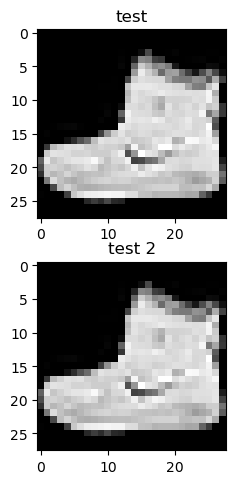

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.tight_layout()

ax1.imshow(train[0][x], cmap="gray")
ax1.set_title("test")

ax2.imshow(train[0][x], cmap="gray")
ax2.set_title("test 2");

In [106]:
def show_image(img, ax=None, figsize=None, title=None, noframe=True, **kwargs):
    if all(hasattr(img, atr) for atr in ("cpu", "permute", "detach")):
        img = img.detach().cpu()
        img = img.permute(2, 1, 0) # c h w -> w h c
    elif not isinstance(img, np.ndarray):
        img = np.array(img)
    img = img.squeeze()

    if ax is None: fig, ax = plt.subplots(figsize=figsize)
    if title is not None: ax.set_title(title)
    if noframe: ax.set_axis_off()

    ax.imshow(img, **kwargs)

    return ax

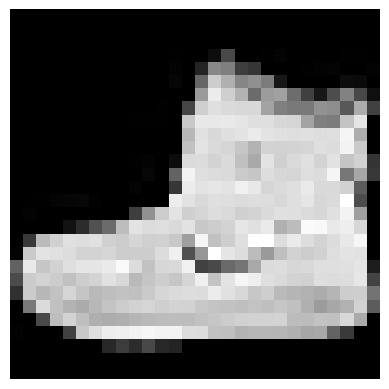

In [107]:
show_image(train[0][x], cmap="gray");

<Axes: >

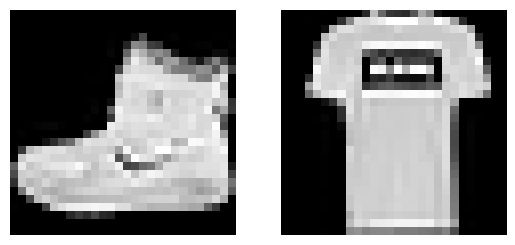

In [93]:
fig, axs = plt.subplots(1, 2)
show_image(train[0][x], axs[0], cmap="gray")
show_image(train[1][x], axs[1], cmap="gray")

In [145]:
def subplots(nrows=1, ncols=1, figsize=None, imsize=3, suptitle=None, **kwargs):
    if figsize is None: 
        figsize = (ncols*imsize, nrows*imsize)

    fig, axs = plt.subplots(nrows, ncols, figsize=figsize, **kwargs)

    if suptitle is not None:
        fig.suptitle(suptitle)

    if nrows*ncols == 1:  ax = np.array([ax])
    return fig, axs

<Axes: >

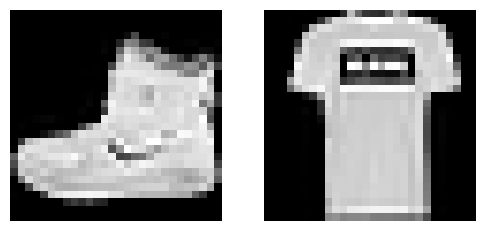

In [146]:
fig, axs = subplots(1, 2)
show_image(train[0][x], axs[0], cmap="gray")
show_image(train[1][x], axs[1], cmap="gray")

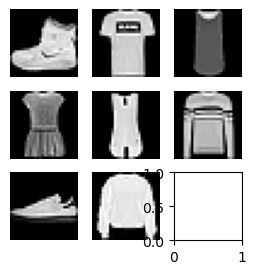

In [147]:
fig, axs = subplots(3, 3, imsize=1)
imgs = train[:8][x]
for ax, img in zip(axs.flat, imgs):
    show_image(img, ax, cmap="gray")

In [148]:
def get_grid(nrows, ncols, suptitle=None, font_weight=None, font_size=14, **kwargs):
    fig, axs = subplots(nrows, ncols, **kwargs)
    
    if suptitle is not None:
        fig.suptitle(suptitle, weight=font_weight, size=font_size)

    for r in range(nrows):
        for c in range(ncols):
            axs[r, c].set_axis_off()
    
    return fig, axs
    

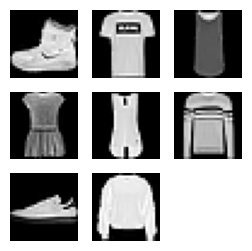

In [149]:
fig, axs = get_grid(3, 3, imsize=1)
imgs = train[:8][x]
for ax, img in zip(axs.flat, imgs):
    show_image(img, ax, cmap="gray")

In [150]:
def show_images(imgs, nrows, ncols, titles=None, img_kwargs={}, **kwargs):
    fig, axs = get_grid(nrows, ncols, **kwargs)

    i = 0
    for r in range(nrows):
        for c in range(ncols):
            if i >= len(imgs): break
            title = titles[i] if titles is not None else ""
        
            show_image(imgs[i], axs[r, c], title=title, **img_kwargs)

            i += 1

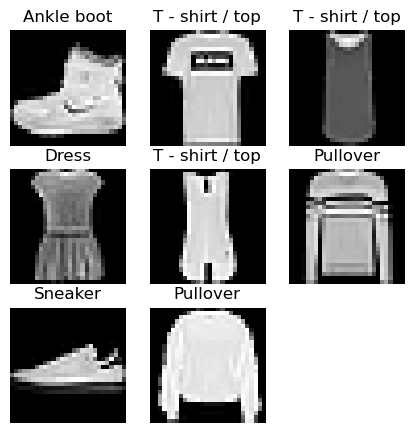

In [152]:
xs = train[:8][x]
ys = train.features[y].int2str(train[:8][y])
show_images(xs, 3, 3, titles=ys, imsize=1.7, img_kwargs=dict(cmap="gray"))

In [164]:
def get_dls(train_ds, valid_ds, bs, **kwargs):
    return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
            DataLoader(valid_ds, batch_size=2*bs, shuffle=False, **kwargs))

class DataLoaders:
    def __init__(self, *dls):
        self.train = dls[0]
        self.val = dls[1]
    
    @classmethod
    def from_dsd(cls, dsd, batch_size, **kwargs):
        train_ds, val_ds = dsd.values()
        collate_func = collate_dict(train_ds)
        train_dl, val_dl = get_dls(train_ds, val_ds, bs=batch_size, collate_fn=collate_func, **kwargs)
        return cls(train_dl, val_dl)
        

In [194]:
vars(DataLoaders.from_dsd(dsd, 64))

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f62ab771fd0>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7f62ab773610>}

In [198]:
dl = DataLoader(tds, collate_fn=collate_dict(tds), batch_size=1)

In [199]:
next(iter(dl))

(tensor([[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
          0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
          0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
          0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
          0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
          0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
          0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.05, 0.29, 0.00, 0.00, 0.00, 0.02,
          0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
          0.00, 0.00, 0.00, 0.00, 0.01, 0.00, 0.14, 0.53, 0.50, 0.24, 0.21, 0.00, 0.00, 0.00, 0.00,
          0.01, 0.02, 0.00, 0.00, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,


In [8]:
import torch.multiprocessing as mp
import os

class Dataset:
    def __init__(self, x, y): 
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]

def foo(*args):
    return args, os.getpid()

with mp.Pool(2) as ex: 
    res = ex.map(foo, range(5), chunksize=4)
for r in res:
    print(r)

((0,), 2448)
((1,), 2448)
((2,), 2448)
((3,), 2448)
((4,), 2448)
